In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.10.19
    Uninstalling nvidia-curand-cu12-10.3.

In [2]:
from ultralytics import YOLO

MODEL = 'yolov8n.pt'
model = YOLO(MODEL)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 147MB/s]


In [3]:
!ls /kaggle/input/sard-search-and-rescue/search-and-rescue

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid



image 1/1 /kaggle/input/sard-search-and-rescue/search-and-rescue/train/images/gss1789_jpg.rf.2f65dfc6a450535c76b26ec81692cc32.jpg: 416x416 1 person, 1 bird, 200.7ms
Speed: 9.2ms preprocess, 200.7ms inference, 15.8ms postprocess per image at shape (1, 3, 416, 416)


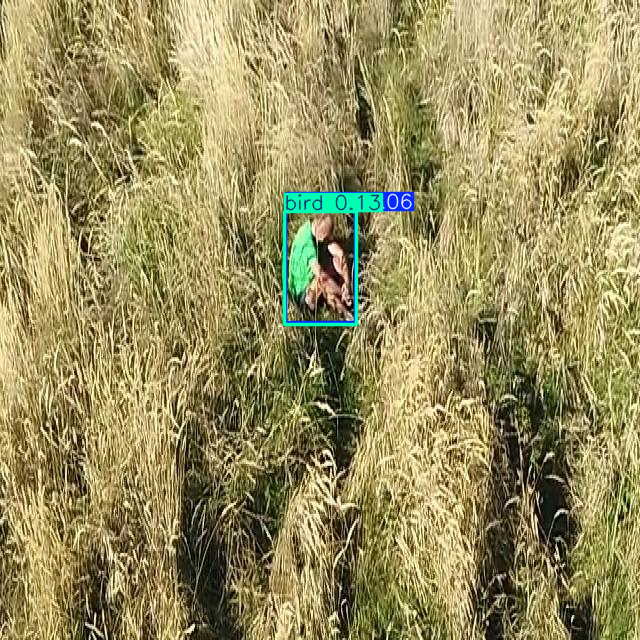

In [4]:
import cv2
import os
import random
from PIL import Image

CONFIDENCE = 0.05
INDEX = 4
SAMPLE_SIZE = 1

images_folder = '/kaggle/input/sard-search-and-rescue/search-and-rescue/train/images'
image_files = [f for f in os.listdir(images_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]
# random_images = random.sample(image_files, SAMPLE_SIZE)
images = [image_files[INDEX]]
for image_file in images:
    image_path = os.path.join(images_folder, image_file)
    result_predict = model.predict(source=image_path, imgsz=(416), conf=CONFIDENCE)
    original_image = Image.open(image_path)
    # display(original_image)
    for result in result_predict:
        plot = result.plot()
        plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
        display(Image.fromarray(plot))

In [5]:
result_predict[0].boxes.cls.numpy().tolist()

[14.0, 0.0]

In [6]:
result_predict[0].boxes.conf.numpy().tolist()

[0.13226811587810516, 0.06414764374494553]

In [7]:
names = model.names
found = [int(item) for item in result_predict[0].boxes.cls.numpy().tolist()]
[names[f] for f in found]

['bird', 'person']

In [8]:
len(model.names)

80

In [9]:
len(image_files)

4041